# 6. 데이터 전처리(Preprocessing)
1) 데이터 클린징

2) 결손값 처리 (Null / NaN 처리)

**3) 데이터 인코딩 (레이블, 원-핫 인코딩): 문자열 → 숫자값**

4) 데이터 스케일링: 단위 통일

5) 이상치 제거: outlier 처리

6) Feature 선택, 추출 및 가공

## 1) 데이터 인코딩
+ 머신러닝 알고리즘은 문자열 데이터 속성을 입력 받지 않으며 모든 데이터는 숫자형으로 표현되어야 한다.

> 문자형 카테고리형 속성은 모두 숫자값으로 변환 / 인코딩 되어야 한다.

1) 레이블 인코딩

2) 원-핫 인코딩

### (1-1) 레이블 인코딩

#### 인코딩 방법
+ LabelEncoder 클래스로
+ fit()과 transform()을 이용하여 변환

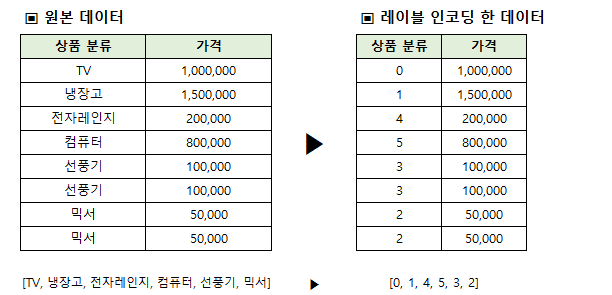

##### > 숫자값으로 변환 되면서 크기 비교, 연산 등이 가능해지면서 변수간 독립성이 무너지게 됨. <br/>      몇몇 알고리즘에 영향을 받을 수 있다는 단점이 있음.  => one-hot 인코딩 필요

In [16]:
from sklearn.preprocessing import LabelEncoder

items = ['냉장고', 'TV', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
print(type(items))
encoder = LabelEncoder() # 레이블 인코더 객체 생성
encoder.fit(items)  # 학습, 변환할 때 fit 사용
labels = encoder.transform(items) # transform: 변환
print('인코딩 변환값: ', labels)

<class 'list'>
인코딩 변환값:  [1 0 4 5 3 3 2 2]


In [7]:
# 인코딩 레이블 문자열값 출력: encoder.classes_
print('인코딩 클래스: ', encoder.classes_)

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [11]:
# 레이블인코딩 값을 다시 원본 문자열로 출력: encoder.inverse_transform([items])
print('디코딩 원본 값: ', encoder.inverse_transform([1, 0, 4, 5, 3, 3, 2, 2]))

디코딩 원본 값:  ['냉장고' 'TV' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


### (1-2) 원-핫(One-Hot)인코딩
+ 원-핫 인코딩은 피처값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 컬럼에만 <br/>1을 표시하고 나머지 컬럼에는 0을 표시하는 방식.

#### 인코딩 방법
+ OneHotEncoder 클래스
+ fit()과 transform()을 이용하여 변환. 인자로 2차원 ndarray 입력 필요. <br/>
   이 때 Sparse 배열 형태로 변환되므로 toarray()를 적용하여 다시 Dense 형태로 변환시켜야 함.
+ pd.get_dummies(DataFrame)을 이용

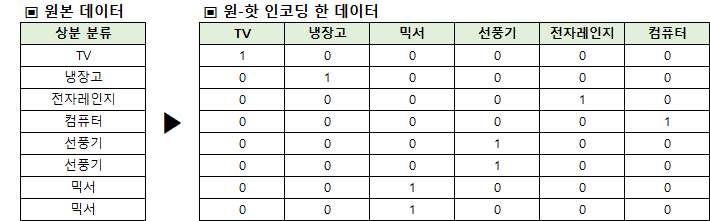

##### > 원-핫 인코딩으로 피처간 사이의 상관관계를 없애준다

In [33]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['냉장고', 'TV', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 2차원 ndarray로 변환
items = np.array(items).reshape(-1,1)
print(type(items))
print(items.shape)
print("=============")
# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)
# => labels = encoder.fit_transform(items)

# OneHotEncoder로 변환한 결과는 Sparse 행렬(희소 행렬)이므로 이를 Dense행렬로 변환.
print('원-핫 인코딩 데이터: ')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원: ')
print('Dense 행렬: ', type(oh_labels.toarray()))
print('Sparse 행렬: ', type(oh_labels))

<class 'numpy.ndarray'>
(8, 1)
원-핫 인코딩 데이터: 
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원: 
Dense 행렬:  <class 'numpy.ndarray'>
Sparse 행렬:  <class 'scipy.sparse._csr.csr_matrix'>


##### 판다스로 간결하게 원-핫 인코딩 하기
+ pd.get_dummies( )

In [34]:
import pandas as pd
df = pd.DataFrame({'item': ['냉장고', 'TV', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
df

,item
0,냉장고
1,TV
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [37]:
ohe_df = pd.get_dummies(df)
display(ohe_df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0
